/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9649

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



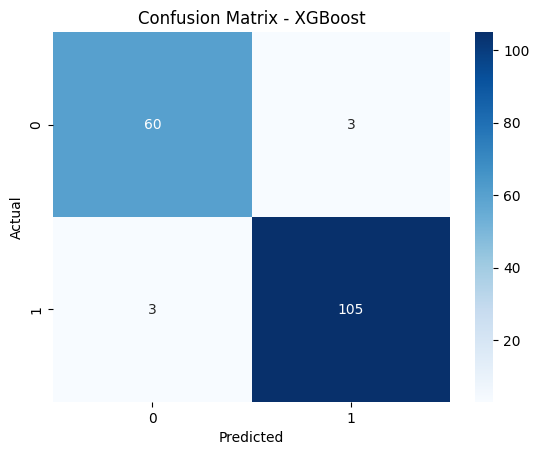

In [3]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
# Create XGBoost model
model = xgb.XGBClassifier(
n_estimators=200, # number of trees
learning_rate=0.1, # step size shrinkage
max_depth=4, # tree depth
subsample=0.8, # for stochastic gradient boosting
colsample_bytree=0.8, # column sampling
random_state=42,
use_label_encoder=False,
eval_metric='logloss'
)
# Train
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

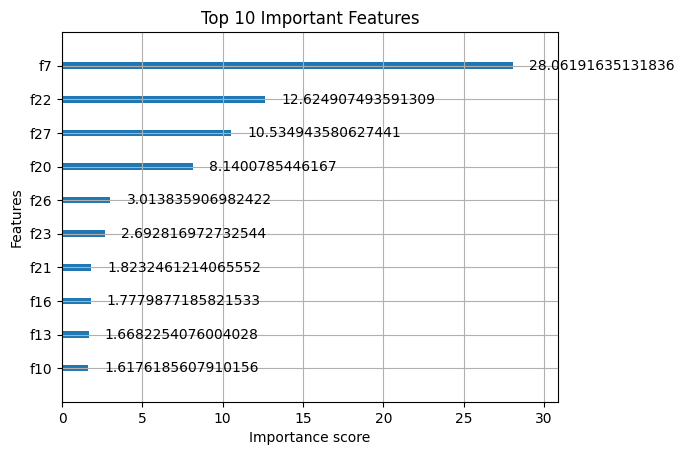

In [4]:
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1, # Print progress
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("Hyperparameter tuning complete.")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Hyperparameter tuning complete.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:01:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
from sklearn.model_selection import GridSearchCV

# Create XGBoost model (re-initialize without use_label_encoder)
model = xgb.XGBClassifier(
    n_estimators=200, # number of trees
    learning_rate=0.1, # step size shrinkage
    max_depth=4, # tree depth
    subsample=0.8, # for stochastic gradient boosting
    colsample_bytree=0.8, # column sampling
    random_state=42,
    eval_metric='logloss'
)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1, # Print progress
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("Hyperparameter tuning complete.")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Hyperparameter tuning complete.


**Reasoning**:
The hyperparameter tuning is complete, and the next logical step is to display the best parameters found by GridSearchCV and the corresponding best accuracy score. This will provide insight into the optimal configuration for the XGBoost model based on the grid search.



In [10]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", round(grid_search.best_score_, 4))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy score:  0.9673


## Summary:

### Data Analysis Key Findings

*   The hyperparameter tuning process, using `GridSearchCV` on an XGBoost model, identified the following optimal parameters:
    *   `colsample_bytree`: 0.8
    *   `learning_rate`: 0.1
    *   `max_depth`: 3
    *   `n_estimators`: 100
    *   `subsample`: 0.8
*   The best accuracy score achieved with these optimal parameters during cross-validation was approximately 0.9673.

